# Приоритизация гипотез и анализ результатов A/B-теста

Был подготовлен список гипотез для увеличения выручки интернет-магазина. Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**Цели исследования:**
1. Приоритизировать гипотезы
2. Проанализировать результаты A/B-теста

**Задачи по приоритизации гипотез:**
1. Приоритизировать гипотезы на основе фреймворка ICE.
2. Приоритизировать гипотезы на основе фреймворка RICE.
3. Сравнить результаты приоритизации гипотез при применении RICE и ICE.

**Задачи по анализу результатов A/B-теста:**
1. Проанализировать результаты A/B теста на предмет наличия аномалий и всплесков.
2. Проанализировать статистическую значимость различий в среднем чеке и количестве заказов по группах по "сырым" данным.
3. Проанализировать статистическую значимость различий в среднем чеке и количестве заказов по группах по "очищенным" данным.
4. Принять решение по результатам теста.

**Описание данных:**

Предоставлены данные:
- о гипотезах, которые нужно приоритизировать,
- о заказах, сделанных в период и в рамках проведения A/B теста,
- о количестве пользователей в период и в рамках проведения A/B теста.

**Показатели:**

Структура файла hypothesis.csv:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Структура файла orders.csv:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Структура файла visitors.csv:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

In [1]:
import scipy.stats as stats
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

## Приоритизация гипотез

Сначала посмотрим на имеющиеся данные.

In [2]:
try:
    hypothesis = pd.read_csv('')
except:
    hypothesis = pd.read_csv('')

pd.set_option('display.max_colwidth', None)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Приоритизация гипотез на основе фреймворка ICE

In [3]:
hypothesis['ICE'] = round(hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'], 2)

hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


### Приоритизация гипотез на основе фреймворка RICE

In [4]:
hypothesis['RICE'] = round(hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'], 2)

hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Сравнение и анализ результатов приоритизации

После добавления параметра охвата пользователей приоритет гипотез изменился. В итоге самый высокий приоритет получила гипотеза с наибольшим параметром Reach - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

Также можно заметить, что 4 гипотезы с наименьшим приоритетом остались прежними: что во фреймворке ICE, что во фреймворке RICE.

## Анализ A/B-теста

Сначала посмотрим на имеющиеся данные.

In [5]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
    
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В обоих датафреймах даты имеют не тот формат, который нужен для анализа. Изменим это.

In [9]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Проверим количество групп в A/B тесте.

In [10]:
print('Группы в датафрейме по заказам:', orders['group'].unique())
print('Группы в датафрейме по посетителям:', visitors['group'].unique())

Группы в датафрейме по заказам: ['B' 'A']
Группы в датафрейме по посетителям: ['A' 'B']


Групп 2 - А и В.

Уточним период, за который нам доступны данные.

In [11]:
print('Период проведения теста (таблица по заказам):', orders['date'].min(), ' - ', orders['date'].max())
print('Период проведения теста (таблица по посетителям):', visitors['date'].min(), ' - ', visitors['date'].max())

Период проведения теста (таблица по заказам): 2019-08-01 00:00:00  -  2019-08-31 00:00:00
Период проведения теста (таблица по посетителям): 2019-08-01 00:00:00  -  2019-08-31 00:00:00


Интервал проведения теста совпадает в обеих таблицах и соответствует периоду с 1 по 31 августа 2019 года.

Посмотрим на распеределение количество пользователей в каждой группе.

In [12]:
print('Количество пользователей, попавших в группу А:', visitors[visitors['group'] == 'A']['visitors'].sum())
print('Количество пользователей, попавших в группу В:', visitors[visitors['group'] == 'B']['visitors'].sum())
print(
      'Различие составляет',
      round(visitors[visitors['group'] == 'A']['visitors'].sum() * 100
      /visitors[visitors['group'] == 'B']['visitors'].sum() - 100, 2),
    '%'
)

Количество пользователей, попавших в группу А: 18736
Количество пользователей, попавших в группу В: 18916
Различие составляет -0.95 %


Количество пользователей в разных группах отличется менее, чем на 1%, что удовлетворяет критерию качества проведения теста.

Проверим не попадают ли у нас пользователи в обе группы.

In [13]:
double_group = orders.groupby('visitorId', as_index=False)['group'].nunique()
double_group = double_group[double_group['group'] > 1]['visitorId']
print('Количество пользователей, попавших в обе группы:', double_group.count())

Количество пользователей, попавших в обе группы: 58


Таких пользователей оказалось 58 человек. Так как эти пользователи видели обе версии сервиса, то нельзя сказать, какая именно вервия повлияла на его решение о покупке. Поэтому во избежание некорректной интерпретации результатов тестирования, исключим их из анализа.

In [14]:
orders = orders.query('visitorId not in @double_group')

Теперь подготовим кумулятивные данные для дальнешего проведения анализа.

In [15]:
register_matplotlib_converters()

datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

### График кумулятивной выручки по группам

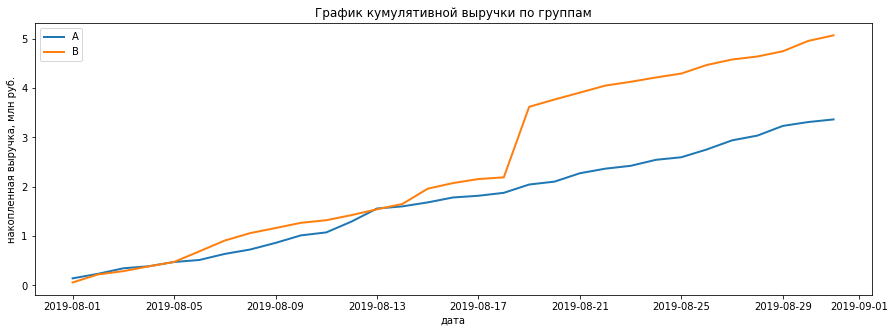

In [16]:
plt.figure(figsize=(15, 5))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/1000000, label='A', linewidth=2.0)
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/1000000, label='B', linewidth=2.0)
plt.title('График кумулятивной выручки по группам')
plt.xlabel('дата')
plt.ylabel('накопленная выручка, млн руб.')
plt.legend()

plt.show()

На графике заметен резкий скачок в группе B в середине теста, который сильно увеличил преимущество группы B по размеру выручки. Можно предположить, что этот всплеск обеспечен какой-то аномалией, поэтому в дальнейшем необходимо будет проверить дата сет на их наличие.

Также видно, что преимущество группы B над группой A по размеру выручки имело бы место даже без этого всплеска, просто разница была бы не такой большой.

### График кумулятивного среднего чека по группам

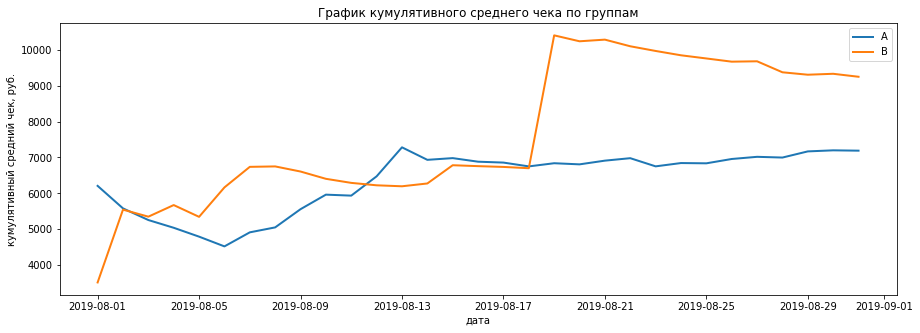

In [17]:
plt.figure(figsize=(15, 5))

# Строим график среднего чека группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A', linewidth=2.0)
# Строим график среднего чека группы А
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B', linewidth=2.0)
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('дата')
plt.ylabel('кумулятивный средний чек, руб.')
plt.legend()

plt.show()

На этом графике снова видны предположительно аномальные скачки, особенно в группе B в середине теста (как и по выручке).

Здесь пока сложно сказать, как изменится расстановка сил после устранения аномалий в случае подтверждения их наличия.

### График относительного изменения кумулятивного среднего чека группы B к группе A

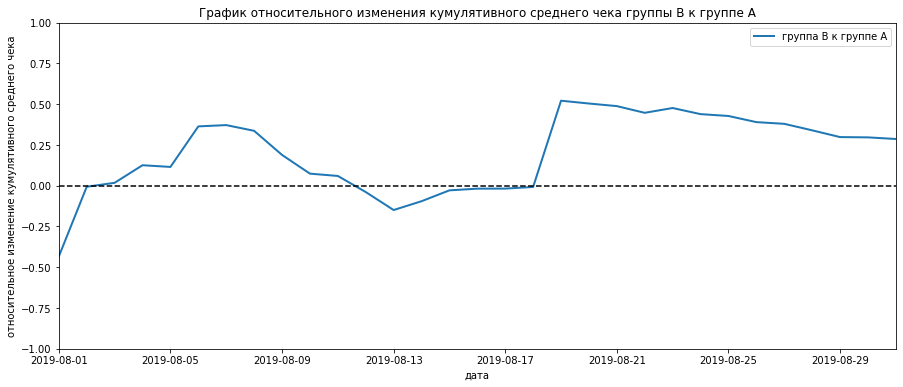

In [18]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date',
    right_on='date', how='left', suffixes=['A', 'B']
)

# cтроим отношение средних чеков
plt.figure(figsize=(15, 6))

plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1,
         label='группа B к группе А', linewidth=2.0)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')

plt.axhline(y=0, color='black', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -1, 1])

plt.xlabel('дата')
plt.ylabel('относительное изменение кумулятивного среднего чека')
plt.legend()

plt.show()

Как и по первым двум графикам, выводы о наличии закономерностей пока сделать сложно из-за наличия скачков, которые могут быть обеспечены аномальными значениями. Сложно сказать, как повел бы себя график без скачка 19 августа.

### График кумулятивного среднего количества заказов по группам

Здесь под "средним количеством заказов" будем понимать среднее количество заказов на одного пользователя, т.е. конверсию в покупку.

In [19]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


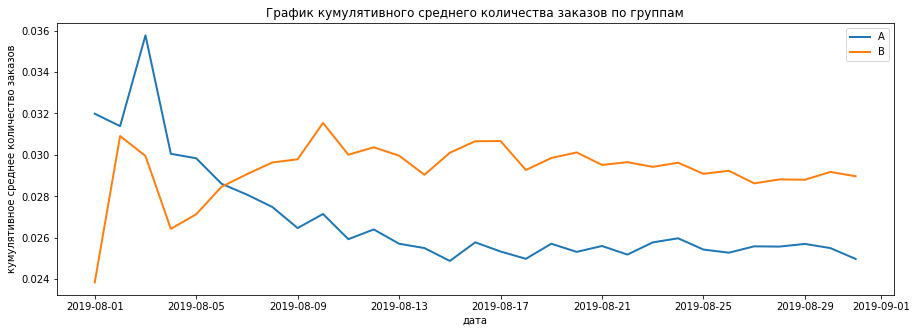

In [20]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15, 5))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A', linewidth=2.0)
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B', linewidth=2.0)
plt.title('График кумулятивного среднего количества заказов по группам')
plt.xlabel('дата')
plt.ylabel('кумулятивное среднее количество заказов')
plt.legend()

plt.show()

По графику видно, что группа B по среднему количеству заказов лидирует по количеству заказов.

### График относительного изменения кумулятивного среднего количества заказов группы B к группе A

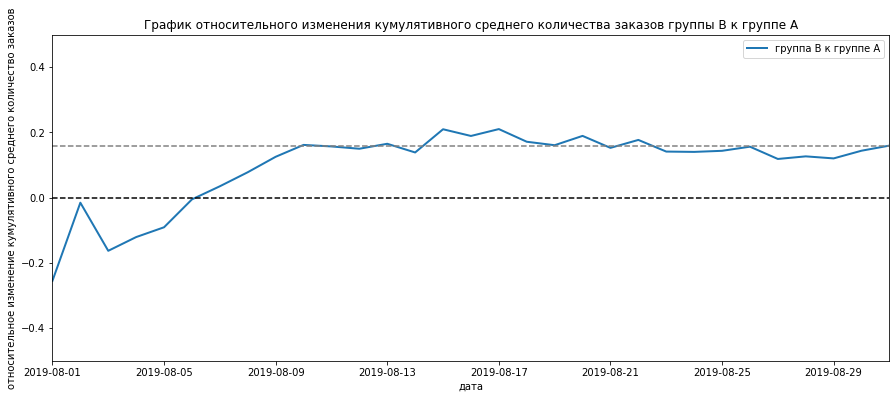

In [21]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
                                 cumulativeDataB[['date','conversion']],
                                 left_on='date', right_on='date',
                                 how='left', suffixes=['A', 'B']
                             )

plt.figure(figsize=(15, 6))

plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
         label="группа B к группе А", linewidth=2.0
        )
plt.title('График относительного изменения кумулятивного среднего количества заказов группы B к группе A')
plt.xlabel('дата')
plt.ylabel('относительное изменение кумулятивного среднего количество заказов')
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.16, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5])

plt.show()

На графике видно, что среднее количество заказов в группе B стабильно превышает среднее количество заказов в группе А. К концу теста относительный прирост среднего количества заказов группы B по отношению к группе А составил 16%. 

### Точечный график количества заказов по пользователям

In [22]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


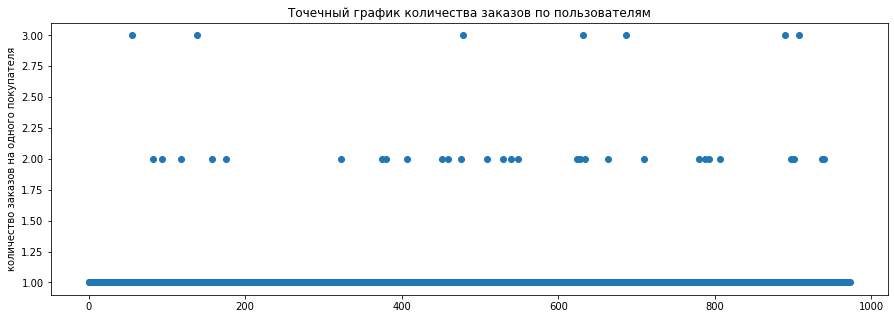

In [23]:
orders_by_users =  orders.groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique',})
x_values = pd.Series(range(0,len(orders_by_users)))

plt.figure(figsize=(15, 5))
plt.title('Точечный график количества заказов по пользователям')
plt.scatter(x_values, orders_by_users['transactionId'])
plt.ylabel('количество заказов на одного покупателя')

plt.show()

По графику видно, что в основном покупатели делают по одному заказу, реже по 2 заказа, и всего 7 пользователей сделали 3 заказа.

### 95-й и 99-й перцентили количества заказов на пользователя

In [24]:
print(np.percentile(orders_by_users['transactionId'], [90, 95, 99])) 

[1. 1. 2.]


Не более 1% пользователей оформляли больше, чем 2 заказа. Учитывая, что на диаграмме рассеяния 3 раза заказали только 7 пользователей, их можно исключить из анализа.
Таким образом, в качестве верхней границы числа заказов примем 2 заказа.

### Точечный график стоимостей заказов

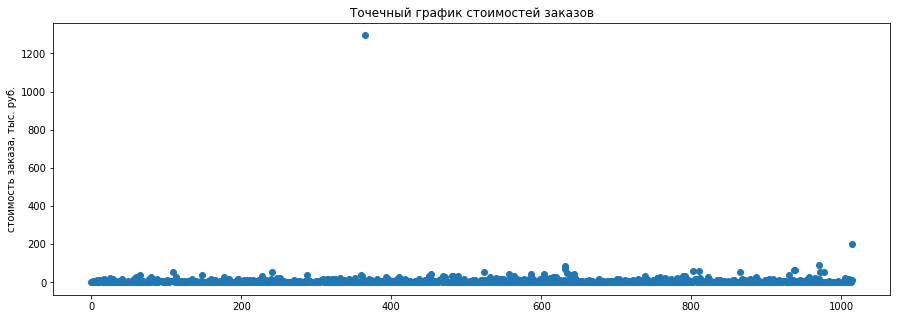

In [25]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(15, 5))

plt.scatter(x_values, orders['revenue']/1000) 
plt.title('Точечный график стоимостей заказов')
plt.ylabel('стоимость заказа, тыс. руб.')

plt.show()

По графику отчетливо видны 2 выброса - заказы на сумму 200 тыс. рублей и 1,3 млн. рублей.

### 95-й и 99-й перцентили стоимости заказов

In [26]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[17990. 26785. 53904.]


По результатам расчета видно, что заказы на сумму более 53,9 тыс. рублей составляют менее 1%. Именно это значение и примем за верхнюю границу стоимости заказов.

### Статистическая значимость различий в среднем количестве заказов между группами по «сырым» данным

Для начала подготовим данные для анализа.

In [27]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Теперь оценим статистическую значимость различий в среднем количестве заказов между группами по тесту Манна-Уитни

В качестве нулевой и альтернативной гипотез примем следующие:
```
H0: среднее количество заказов в группе А = среднее количество заказов в группе B
H1: среднее количество заказов в группе А ≠ среднее количество заказов в группе B

```

In [28]:
sampleA

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18736, dtype: int64

In [29]:
print(stats.mannwhitneyu(sampleA, sampleB)[1])

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.011018084110014696
0.160


В качестве статистической значимости примем 5%.

По результатам теста по "сырым" данным P-value меньше 5%, поэтому нулевую гипотезу можно было бы отвергнуть и говорить о статистической значимости различий между группами. Но мы помним, что в данных есть аномалии. В дальнейшем посмотрим, какое они окажут влияние на результат.

На данном этапе относительный прирост среднего количества заказов в группе B к группе А составил 16%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

В качестве нулевой и альтернативной гипотез примем следующие:
```
H0: средний чек в группе А = средний чек в группе B
H1: средний чек в группе А ≠ средний чек в группе B

```

In [35]:
orders[orders['group']=='A']['revenue']

7        1044
8       13710
10       4008
12       7370
14      10980
        ...  
1185      730
1187      750
1188      112
1193     3190
1194    10550
Name: revenue, Length: 468, dtype: int64

In [30]:
print(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.8294908998149533
0.287


Здесь ситуация иная - статистически значимых различий в среднем чеке между группами пока нет. Но относительный прирост среднего чека группы B по отношению к группе A довольно большой - 28,7%. Это может быть следствием влияния аномалий. Проверим это при анализе "очищенных" данных.

### Статистическая значимость различий в среднем количестве заказов между группами по «очищенным» данным

Сначала очистим данные от аномалий, применив границы количества заказов и среднего чека.
Напомним, что для количества заказов мы установили границу в 2 заказа, а для среднего чека - в 58300 рублей.

In [31]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

orders_limit = 2
revenue_limit = 58300

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > orders_limit]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > orders_limit]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_limit]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

Теперь заново подготовим данные для анализа, уже "очищенные".

In [32]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']


usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 10000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)


sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [33]:
print(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.006793792730532926
0.219


По "очищенным" данным статистическая значимость возросла: с 0,011 по "сырым" данным до 0,007 - по "очищенным". Теперь мы можем отвергать нулевую гипотезу и признавать статистические различия между группами. Кроме того, относительный прирост среднего количества заказов в группе B к группе А составил 21,9%, что значительно больше, чем при анализе "сырых" данных.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [34]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.759
0.008


Статистическая значимость различий в средних чеках так и осталась недостаточной для того, чтобы отвергнуть нулевую гипотезу. Теперь можно с уверенностью сказать, что различий между группами А и В по этому параметру нет.

### Выводы по результатам теста, решение по дальнейшему проведению теста

В результате проведенного исследования были получены следующие результаты:

1. В ходе приоритизации была установлена гипотеза с наивысшим приоритетом: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Для приоритизации был использован фреймворк RICE, поскольку он учитывает все четыре важнейшие компонента:
- Reach (охват пользователей, которых затронет изменение);
- Impact (сила влияния изменений на пользователей, их опыт и удовлетворенность от продукта);
- Confidence (степень уверенности в именно таком влиянии изменений на пользователей);
- Efforts (затраты, которые необходимы для тестирования гипотезы).

2. В ходе предобработки результатов тестирования было выявлено, что 58 пользователей попали в обе группы сразу. Поскольку пользователям демонстрировались обе версии сервиса, нельзя с уверенностью сказать, какая именно вервия повлияла на их решения о покупке. При последующих проведения тестирования следует обратить внимание на данный аспект и минимизировать вероятность попадания одного пользователя в две группы.


3. В ходе анализа кумулятивных значений показателей выручки, конверсии и среднего чека были выявлены следующие особенности:
- в середине теста имел место аномальный скачек, который привел к значительному увеличению преимущества группы B по размеру выручки и среднему чеку;
- по количеству заказов почти с самого начала теста лидировала группа B, по этому показателю сильных скачков зафиксировано не было;
- среднее количество заказов в группе B стабильно превышало среднее количество заказов в группе А, к концу теста относительный прирост среднего количества заказов группы B по отношению к группе А составил 16%.

4. В ходе анализа распределения пользователей по количеству заказов и среднему чеку были сделаны следующие выводы:
- основная часть пользователей оформляла по одному заказу;
- более двух заказов оформили не более 1% пользователей;
- только 7 пользователей оформили заказы 3 раза;
- по среднему чеку были зафиксированы 2 наиболее явных выброса - заказы на сумму 200 тыс. рублей и 1,3 млн. рублей;
- заказы на сумму более 53,9 тыс. рублей составили менее 1%.

**Общий вывод по A/B тесту:**

По рассмотренным графикам и расчетным показателям статистической значимости теста и относительного прироста можно принять решение об остановке теста и зафиксировать следующие выводы:
1. Между группами существуют различия в количестве заказов на одного покупателя. Относительный прирост среднего количества заказов в группе B к группе А составил 20,5%.
2. Между группами отсутствуют различия в средних чеках.

На основе этих выводов можно рекомендовать к реализации изменения, тестируемые на группе B. Внедрение этой версии продукта позволит увеличить количество заказов на одного пользователя.